## PROCEDURE

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import calendar
import csv


from matplotlib import gridspec
from collections import OrderedDict
from sklearn.linear_model import Lasso
from matplotlib.pyplot import xticks
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# COVID DAILY CASES

In [45]:
data = pd.DataFrame(pd.read_csv('210214COVID19MEXICO.csv'))
data.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,14/02/2021,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,14/02/2021,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,14/02/2021,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,14/02/2021,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,14/02/2021,zz8e77,1,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


In [46]:
#Duplicated ID
sum(data.duplicated(subset = 'ID_REGISTRO')) == 0

False

In [47]:
data.shape

(1048575, 40)

In [48]:
round(100*(data.isnull().sum()/len(data.index)), 2)

FECHA_ACTUALIZACION      0.0
ID_REGISTRO              0.0
ORIGEN                   0.0
SECTOR                   0.0
ENTIDAD_UM               0.0
SEXO                     0.0
ENTIDAD_NAC              0.0
ENTIDAD_RES              0.0
MUNICIPIO_RES            0.0
TIPO_PACIENTE            0.0
FECHA_INGRESO            0.0
FECHA_SINTOMAS           0.0
FECHA_DEF                0.0
INTUBADO                 0.0
NEUMONIA                 0.0
EDAD                     0.0
NACIONALIDAD             0.0
EMBARAZO                 0.0
HABLA_LENGUA_INDIG       0.0
INDIGENA                 0.0
DIABETES                 0.0
EPOC                     0.0
ASMA                     0.0
INMUSUPR                 0.0
HIPERTENSION             0.0
OTRA_COM                 0.0
CARDIOVASCULAR           0.0
OBESIDAD                 0.0
RENAL_CRONICA            0.0
TABAQUISMO               0.0
OTRO_CASO                0.0
TOMA_MUESTRA_LAB         0.0
RESULTADO_LAB            0.0
TOMA_MUESTRA_ANTIGENO    0.0
RESULTADO_ANTI

In [49]:
entidadres = data.loc[(data['ENTIDAD_RES'] == 13)]
entidadres.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
51,14/02/2021,z53e08,1,12,13,2,28,13,48,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
149,14/02/2021,0aefba,1,12,13,1,13,13,48,1,...,99,1,1,2,97,3,99,MÃ©xico,97,97
158,14/02/2021,0dbfb5,1,12,13,1,30,13,29,1,...,2,1,2,2,97,7,99,MÃ©xico,97,97
164,14/02/2021,136408,1,12,13,2,13,13,48,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
173,14/02/2021,076b8c,1,8,13,1,14,13,76,1,...,1,2,97,2,97,6,99,MÃ©xico,97,97


In [50]:
#entidadresBc = entidadresBc[['EDAD','SEXO','FECHA_INGRESO']]
                             #'FECHA_SINTOMAS','ENTIDAD_RES','MUNICIPIO_RES','UCI','CLASIFICACION_FINAL']]
entidadres = entidadres[['EDAD','SEXO','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','ENTIDAD_RES','MUNICIPIO_RES','TIPO_PACIENTE', 'NEUMONIA','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
             'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO','UCI','CLASIFICACION_FINAL']]
entidadres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL
51,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,2,2,2,2,2,2,2,1,97,7
149,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,2,2,2,2,2,2,2,99,97,3
158,27,1,29/07/2020,29/07/2020,9999-99-99,13,29,1,2,2,...,1,2,2,2,2,2,2,2,97,7
164,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,2,2,2,2,2,2,2,1,97,3
173,78,1,22/05/2020,21/05/2020,9999-99-99,13,76,1,2,2,...,2,2,2,2,2,2,2,1,97,6


In [51]:
entidadres.shape

(13038, 22)

In [52]:
#entidadresBc.to_csv('C:/Users/almej/Desktop/EntidadBaja.csv')

# AGEB

In [53]:
entidades = pd.DataFrame(pd.read_csv('AGEEML_20201211021224.csv'))
entidades.head(5) 

,Mapa,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Ãmbito,Latitud,Longitud,Lat_Decimal,Lon_Decimal,Altitud,Cve_Carta,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,10010001,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21Â°52Â´47.362N""","102Â°17Â´45.768W""",21.879823,-102.296047,1878,F13D19,722250,348722,373528,185120
1,10010094,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,R,"21Â°52Â´18.749N""","102Â°22Â´24.710W""",21.871875,-102.373531,1902,F13D18,14,*,*,2
2,10010096,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,R,"21Â°53Â´01.522N""","102Â°21Â´25.639W""",21.883756,-102.357122,1861,F13D18,37,21,16,11
3,10010100,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,R,"21Â°51Â´16.556N""","102Â°22Â´21.884W""",21.854599,-102.372746,1879,F13D18,10,*,*,1
4,10010102,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],R,"21Â°46Â´48.650N""","102Â°21Â´26.261W""",21.780181,-102.357295,1861,F13D18,7,*,*,1


In [54]:
#Duplicated ID
sum(entidades.duplicated(subset = 'Mapa')) == 0

True

In [55]:
round(100*(entidades.isnull().sum()/len(entidades.index)), 2)

Mapa                            0.0
Cve_Ent                         0.0
Nom_Ent                         0.0
Nom_Abr                         0.0
Cve_Mun                         0.0
Nom_Mun                         0.0
Cve_Loc                         0.0
Nom_Loc                         0.0
Ãmbito                         0.0
Latitud                         0.0
Longitud                        0.0
Lat_Decimal                     0.0
Lon_Decimal                     0.0
Altitud                         0.0
Cve_Carta                       0.0
Pob_Total                       0.0
Pob_Masculina                   0.0
Pob_Femenina                    0.0
Total De Viviendas Habitadas    0.0
dtype: float64

In [56]:
entidades[entidades['Mapa'].duplicated() == True]

,Mapa,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Ãmbito,Latitud,Longitud,Lat_Decimal,Lon_Decimal,Altitud,Cve_Carta,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas


In [57]:
entidades = entidades[['Cve_Ent','Nom_Ent','Nom_Abr','Cve_Mun','Nom_Mun','Cve_Loc', 'Nom_Loc','Lat_Decimal', 'Lon_Decimal', 'Altitud', 'Pob_Total',
             'Pob_Masculina', 'Pob_Femenina', 'Total De Viviendas Habitadas']]
entidades.head(5)

,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,21.879823,-102.296047,1878,722250,348722,373528,185120
1,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,21.871875,-102.373531,1902,14,*,*,2
2,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,21.883756,-102.357122,1861,37,21,16,11
3,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,21.854599,-102.372746,1879,10,*,*,1
4,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],21.780181,-102.357295,1861,7,*,*,1


In [58]:
dataEnt = entidades.loc[(entidades['Cve_Ent'] == 13 ) & (entidades['Cve_Loc'] == 1)]         
dataEnt.head(5)

,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
114976,13,Hidalgo,Hgo.,1,AcatlÃ¡n,1,AcatlÃ¡n,20.145903,-98.438372,2130,405,192,213,107
115034,13,Hidalgo,Hgo.,2,AcaxochitlÃ¡n,1,AcaxochitlÃ¡n,20.158693,-98.203244,2255,4026,1939,2087,946
115097,13,Hidalgo,Hgo.,3,Actopan,1,Actopan,20.269086,-98.942901,2003,29223,13720,15503,7314
115140,13,Hidalgo,Hgo.,4,Agua Blanca de Iturbide,1,Agua Blanca de Iturbide,20.349504,-98.356386,2183,2007,932,1075,498
115168,13,Hidalgo,Hgo.,5,Ajacuba,1,Ajacuba,20.092525,-99.122133,2143,7245,3546,3699,1831


In [59]:
dataEnt.shape

(84, 14)

In [60]:
#dataEntBc.to_csv('C:/Users/almej/Desktop/EntidadesBc.csv')

# MERGING

In [61]:
entidadesres = entidadres #pd.read_csv("EntidadHidalgo.csv")
entidadesres.rename(columns={'ENTIDAD_RES':'Cve_Ent','MUNICIPIO_RES':'Cve_Mun'}, inplace=True)
entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL
51,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,2,2,2,2,2,2,2,1,97,7
149,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,2,2,2,2,2,2,2,99,97,3
158,27,1,29/07/2020,29/07/2020,9999-99-99,13,29,1,2,2,...,1,2,2,2,2,2,2,2,97,7
164,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,2,2,2,2,2,2,2,1,97,3
173,78,1,22/05/2020,21/05/2020,9999-99-99,13,76,1,2,2,...,2,2,2,2,2,2,2,1,97,6


In [62]:
entidadesres.shape

(13038, 22)

In [63]:
Entidadesres= entidadesres.merge(dataEnt, how = 'inner', on = ['Cve_Mun'])
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent_x,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,...,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,21/01/2020,19/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,02/01/2020,01/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [64]:
Entidadesres.shape

(13038, 35)

In [66]:
Entidadesres = Entidadesres.drop(['Cve_Ent_y'], axis=1)
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent_x,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,...,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,21/01/2020,19/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,02/01/2020,01/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [67]:
Entidadesres.rename(columns={'Cve_Ent_x':'Cve_Ent','Cve_Mun':'MUNICIPIO_RES'}, inplace=True)
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,...,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,21/01/2020,19/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,02/01/2020,01/01/2020,9999-99-99,13,48,1,99,2,...,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [68]:
Entidadesres.shape

(13038, 34)

In [69]:
#EntidadesresBC3.to_csv('EntidadresBC.csv')

# AGE

In [70]:
X_train_data = Entidadesres #pd.read_csv("EntidadresHgo2.csv")
bins=[0,10,20, 29, 39, 49, 59, 69, 79, 89, 99, 109]
X_train_data['AGE_GROUP'] = pd.cut(X_train_data['EDAD'], bins=bins, right=False)
X_train_data.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,...,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas,AGE_GROUP
0,39,2,28/04/2020,24/04/2020,9999-99-99,13,48,1,2,2,...,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[39, 49)"
1,37,1,21/05/2020,18/05/2020,9999-99-99,13,48,1,99,2,...,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[29, 39)"
2,28,2,01/09/2020,28/08/2020,9999-99-99,13,48,1,2,2,...,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)"
3,23,1,21/01/2020,19/01/2020,9999-99-99,13,48,1,99,2,...,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)"
4,57,1,02/01/2020,01/01/2020,9999-99-99,13,48,1,99,2,...,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[49, 59)"


# DATES

In [71]:
X_train_data["MONTH"] = X_train_data["FECHA_INGRESO"].str.slice_replace(stop=3, repl="")
X_train_data.drop(columns="FECHA_INGRESO", inplace=True)
X_train_data.head(5)

,EDAD,SEXO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,...,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas,AGE_GROUP,MONTH
0,39,2,24/04/2020,9999-99-99,13,48,1,2,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[39, 49)",04/2020
1,37,1,18/05/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[29, 39)",05/2020
2,28,2,28/08/2020,9999-99-99,13,48,1,2,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)",09/2020
3,23,1,19/01/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)",01/2020
4,57,1,01/01/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[49, 59)",01/2020


In [72]:
X_train_data.describe()

,EDAD,SEXO,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Cve_Loc,Lat_Decimal,Lon_Decimal
count,13038.000000,13038.000000,13038.0,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,...,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,13038.000000,13038.0,13038.000000,13038.000000
mean,42.996395,1.518945,13.0,49.681546,1.289462,6.528915,1.938948,2.083218,2.057831,2.072250,...,2.039270,1.887483,2.052539,1.991103,20.469781,71.512502,4.923991,1.0,20.135598,-98.805215
std,17.170771,0.499660,0.0,21.423499,0.453530,20.927776,3.056616,3.259443,2.792104,2.914416,...,2.527382,2.820795,2.793156,2.804611,38.650784,42.163854,1.903148,0.0,0.325103,0.319941
min,0.000000,1.000000,13.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,19.657008,-99.651181
25%,31.000000,1.000000,13.0,41.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.0,19.956591,-98.981584
50%,42.000000,2.000000,13.0,48.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,6.000000,1.0,20.092525,-98.737001
75%,54.000000,2.000000,13.0,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,7.000000,1.0,20.122360,-98.603913
max,99.000000,2.000000,13.0,84.000000,2.000000,99.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,7.000000,1.0,21.194782,-98.078424


In [73]:
X_train_data.isnull().sum()

EDAD                            0
SEXO                            0
FECHA_SINTOMAS                  0
FECHA_DEF                       0
Cve_Ent                         0
MUNICIPIO_RES                   0
TIPO_PACIENTE                   0
NEUMONIA                        0
DIABETES                        0
EPOC                            0
ASMA                            0
INMUSUPR                        0
HIPERTENSION                    0
OTRA_COM                        0
CARDIOVASCULAR                  0
OBESIDAD                        0
RENAL_CRONICA                   0
TABAQUISMO                      0
OTRO_CASO                       0
UCI                             0
CLASIFICACION_FINAL             0
Nom_Ent                         0
Nom_Abr                         0
Nom_Mun                         0
Cve_Loc                         0
Nom_Loc                         0
Lat_Decimal                     0
Lon_Decimal                     0
Altitud                         0
Pob_Total     

In [74]:
X_train_data.rename(columns={'Nom_Ent':'NOM_ENT','Nom_Abr':'NOM_ABR',
                             'Cve_Loc':'CVE_LOC','Nom_Loc':'NOM_LOC','Cve_Mun':'CVE_MUN',
                             'Lat_Decimal':'LAT_DECIMAL','Lon_Decimal':'LON_DECIMAL',
                            'Altitud':'ALTITUD','Pob_Total':'POB_TOTAL',
                            'Pob_Masculina':'POB_MASCULINA','Pob_Femenina':'POB_FEMENINA',
                            'Total De Viviendas Habitadas':'VIV_HABITADAS','Cve_Ent':'CVE_ENT','Nom_Mun':'NOM_MUN'}, inplace=True)
X_train_data.head(5)

,EDAD,SEXO,FECHA_SINTOMAS,FECHA_DEF,CVE_ENT,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,...,NOM_LOC,LAT_DECIMAL,LON_DECIMAL,ALTITUD,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,VIV_HABITADAS,AGE_GROUP,MONTH
0,39,2,24/04/2020,9999-99-99,13,48,1,2,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[39, 49)",04/2020
1,37,1,18/05/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[29, 39)",05/2020
2,28,2,28/08/2020,9999-99-99,13,48,1,2,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)",09/2020
3,23,1,19/01/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[20, 29)",01/2020
4,57,1,01/01/2020,9999-99-99,13,48,1,99,2,2,...,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,"[49, 59)",01/2020


In [75]:
X_train_data.isnull().sum()

EDAD                   0
SEXO                   0
FECHA_SINTOMAS         0
FECHA_DEF              0
CVE_ENT                0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
NEUMONIA               0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
UCI                    0
CLASIFICACION_FINAL    0
NOM_ENT                0
NOM_ABR                0
NOM_MUN                0
CVE_LOC                0
NOM_LOC                0
LAT_DECIMAL            0
LON_DECIMAL            0
ALTITUD                0
POB_TOTAL              0
POB_MASCULINA          0
POB_FEMENINA           0
VIV_HABITADAS          0
AGE_GROUP              0
MONTH                  0
dtype: int64

In [76]:
X_train_data.to_csv('C:/Users/almej/Desktop/ProcessedCol.csv')

# CLIMA

In [4]:
clima = pd.DataFrame(pd.read_csv('ClimasColima.csv'))
clima.head(5) 

,OBJECTID,AREA,PERIMETER,FINAL2_,FINAL2_ID,CONT_FIN_,CONT_FIN_I,CLAVE,FC,TIPO_N,TIPO_C,SHAPE_area,SHAPE_len,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO
0,2,3.318780e+12,31641430.00,3,2,3,1784,H2O,16291,92,Agua,3.318830e+12,3.164161e+07,6001,6,1,Armería
1,1147,4.967212e+10,6519816.00,1148,1147,1148,123,Aw0(w),22012,12,Cálido subhúmedo,4.967042e+10,6.519665e+06,6001,6,1,Armería
2,1300,1.086579e+08,76637.62,1301,1300,1301,48,A(C)w1(w),22023,22,Semicálido subhúmedo,1.086521e+08,7.663557e+04,6001,6,1,Armería
3,1331,6.336817e+08,139962.90,1332,1331,1332,53,BS1(h')w(w),22075,51,Semiseco muy cálido,6.336530e+08,1.399567e+05,6001,6,1,Armería
4,1147,4.967212e+10,6519816.00,1148,1147,1148,123,Aw0(w),22012,12,Cálido subhúmedo,4.967042e+10,6.519665e+06,6002,6,2,Colima


In [6]:
clima.describe()

,OBJECTID,AREA,PERIMETER,FINAL2_,FINAL2_ID,CONT_FIN_,CONT_FIN_I,FC,TIPO_N,SHAPE_area,SHAPE_len,CVEGEO,CVE_ENT,CVE_MUN
count,59.000000,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,5.900000e+01,59.000000,59.0,59.000000
mean,1165.762712,1.777544e+11,2.899235e+06,1172.152542,1171.152542,1172.152542,367.644068,21741.694915,28.966102,1.777566e+11,2.899214e+06,6005.779661,6.0,5.779661
std,284.110732,7.334784e+11,7.119532e+06,282.029395,282.029395,282.029395,710.097511,1272.858990,21.150500,7.334895e+11,7.119558e+06,2.918832,0.0,2.918832
min,2.000000,2.044795e+05,1.773353e+03,3.000000,2.000000,3.000000,1.000000,16291.000000,12.000000,2.044727e+05,1.773316e+03,6001.000000,6.0,1.000000
25%,1147.000000,1.256934e+08,7.663762e+04,1148.000000,1147.000000,1148.000000,29.000000,22009.000000,12.000000,1.256853e+08,7.663557e+04,6003.000000,6.0,3.000000
50%,1249.000000,5.581577e+08,1.548916e+05,1250.000000,1249.000000,1250.000000,48.000000,22023.000000,22.000000,5.581123e+08,1.548830e+05,6006.000000,6.0,6.000000
75%,1278.000000,3.164033e+09,1.284068e+06,1279.000000,1278.000000,1279.000000,123.000000,22036.000000,32.000000,3.163982e+09,1.284053e+06,6008.000000,6.0,8.000000
max,1362.000000,3.318780e+12,3.164143e+07,1363.000000,1362.000000,1363.000000,1984.000000,22145.000000,92.000000,3.318830e+12,3.164161e+07,6010.000000,6.0,10.000000


In [7]:
clima.shape

(59, 17)

In [8]:
round(100*(clima.isnull().sum()/len(clima.index)), 2)

OBJECTID      0.0
AREA          0.0
PERIMETER     0.0
FINAL2_       0.0
FINAL2_ID     0.0
CONT_FIN_     0.0
CONT_FIN_I    0.0
CLAVE         0.0
FC            0.0
TIPO_N        0.0
TIPO_C        0.0
SHAPE_area    0.0
SHAPE_len     0.0
CVEGEO        0.0
CVE_ENT       0.0
CVE_MUN       0.0
NOMGEO        0.0
dtype: float64

In [10]:
clima = clima[['AREA','TIPO_N','CVE_MUN']]
clima.head(5)

,AREA,TIPO_N,CVE_MUN
0,3.318780e+12,92,1
1,4.967212e+10,12,1
2,1.086579e+08,22,1
3,6.336817e+08,51,1
4,4.967212e+10,12,2


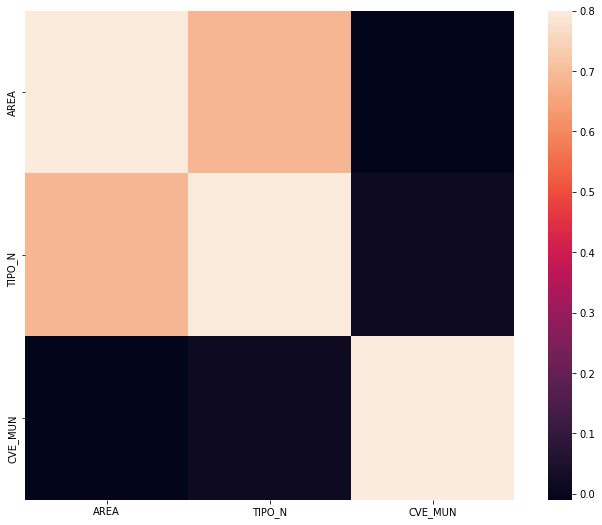

In [11]:
corrmat = clima.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

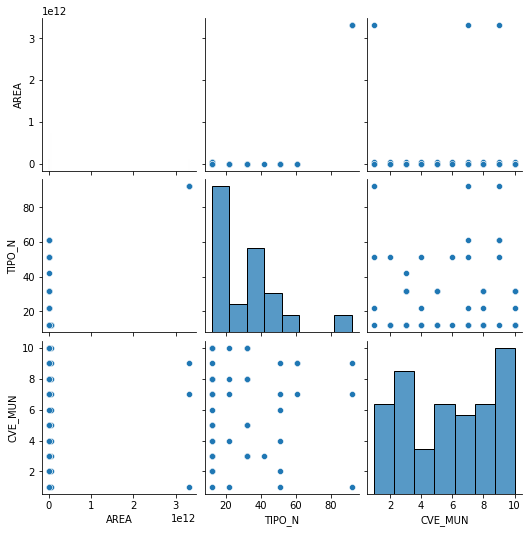

In [12]:
sns.pairplot(data=clima)